In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph

In [8]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [9]:
# create the graph using networkx library
G = nx.DiGraph()
edge_labels = {}

# add the states to the graphTION_MATRIX.size):
for action_1 in range(TRANSITION_MATRIX.shape[0]):
    for action_2 in range(TRANSITION_MATRIX.shape[1]):
        for i in range(TRANSITION_MATRIX.shape[2]):
            for j in range(TRANSITION_MATRIX.shape[3]):
                if TRANSITION_MATRIX[action_1][action_2][i][j] > 0:
                    str_label = '(' + str(action_1) + ', ' + str(action_2) + '), p: ' + str(TRANSITION_MATRIX[action_1][action_2][i][j])
                    #print(i, j)
                    #print(str_label)
                    G.add_edge(i, j)
                    if edge_labels.get((i, j)) is not None:
                        edge_labels[(i, j)] += '\n' + str_label
                    else:
                        edge_labels[(i, j)] = str_label

node_colors = {}
for i in range(TRANSITION_MATRIX.shape[2]):
    node_colors[i] = 'k'

In [10]:
%store node_colors
%store edge_labels
%store G

Stored 'node_colors' (dict)
Stored 'edge_labels' (dict)
Stored 'G' (DiGraph)


In [11]:
def plot_graph(G, node_colors, edge_labels, ax):
    Graph(G, node_labels=True, node_layout='circular', edge_labels=edge_labels,
    edge_label_fontdict=dict(size=30, fontweight='bold'), edge_layout='arc',
    node_size=6, edge_width=0.5, arrows=True, ax=ax, node_edge_color=node_colors, node_label_fontdict=dict(size=50), edge_label_position=0.2, edge_labels_rotate=False)

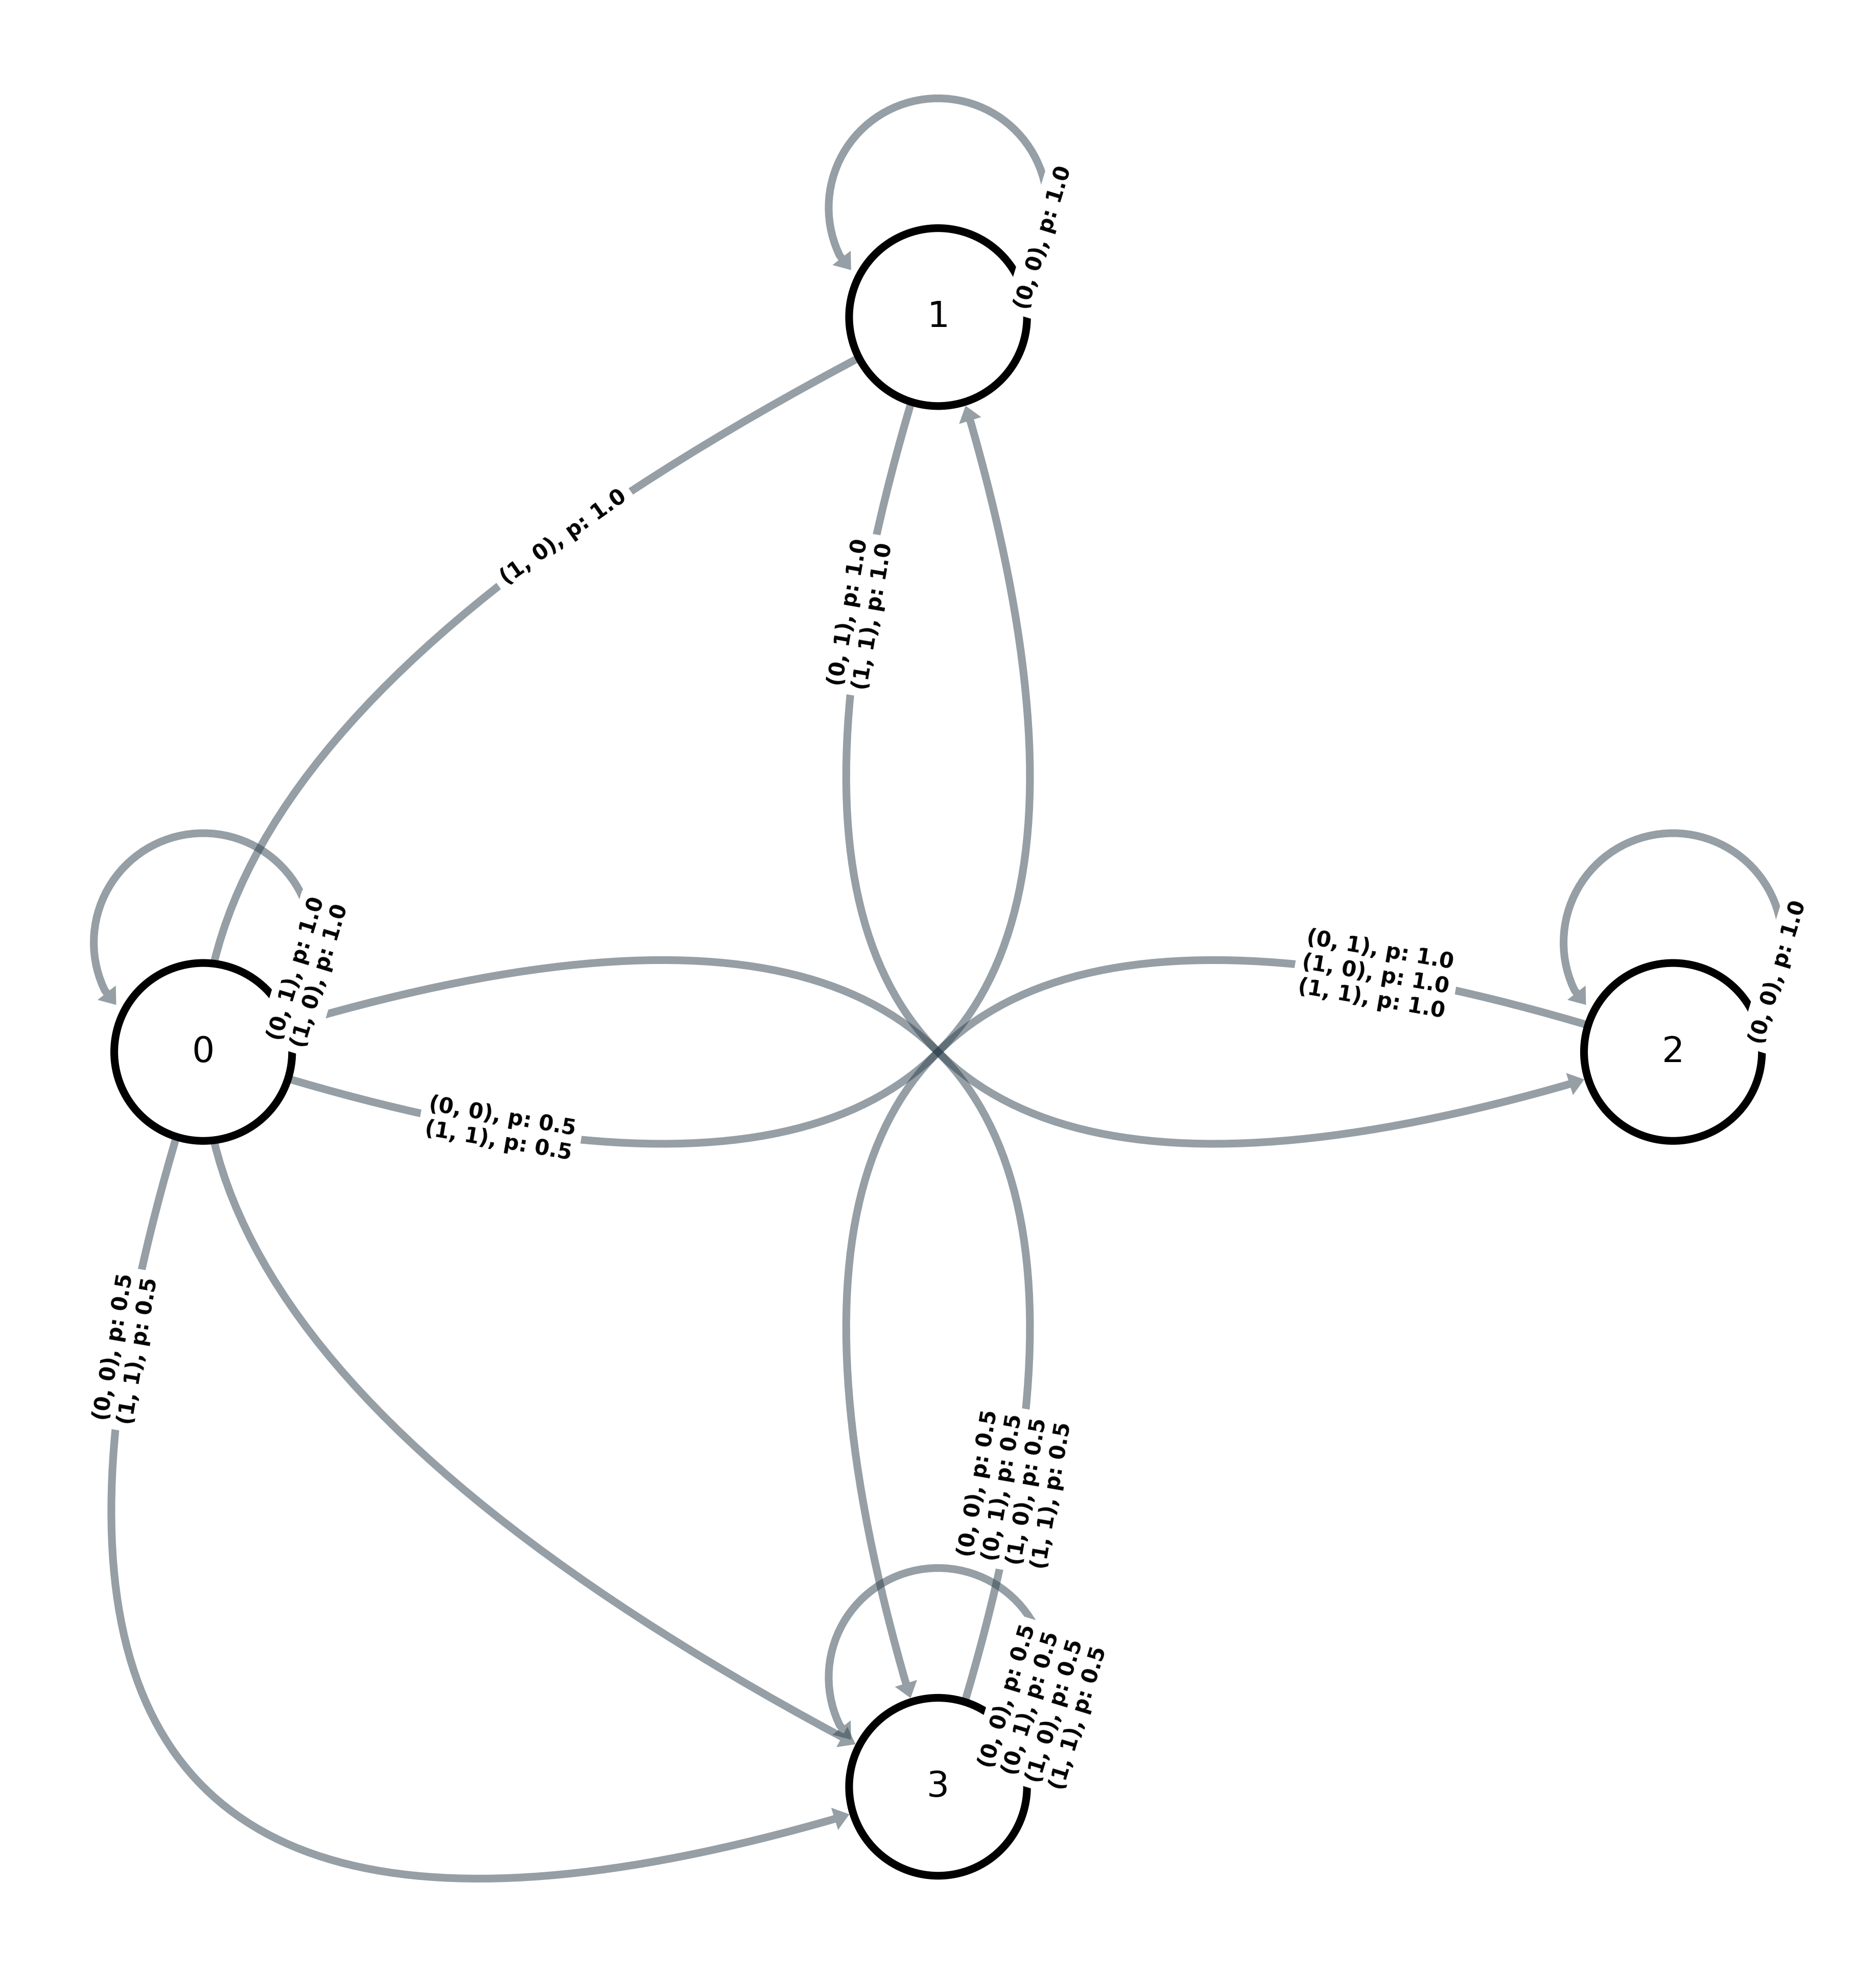

In [12]:
fig, ax = plt.subplots(figsize=(50, 50))
plot_graph(G, node_colors, edge_labels, ax)